In [2]:
# 添加项目目录
import sys
from se.infras.models import AccountModel
if '/Users/zhang/PycharmProjects/strategy_engine_v2' not in sys.path:
    sys.path.append("/Users/zhang/PycharmProjects/strategy_engine_v2")


(MainThread) 210121_19:26:11.008 WARNING connection.py:101 Cluster.__init__ called with contact_points specified, but no load_balancing_policy. In the next major version, this will raise an error; please specify a load-balancing policy. (contact_points = ['127.0.0.1'], lbp = None)
(MainThread) 210121_19:26:11.021 INFO policies.py:289 Using datacenter 'datacenter1' for DCAwareRoundRobinPolicy (via host '127.0.0.1:9042'); if incorrect, please specify a local_dc to the constructor, or limit contact points to local cluster nodes


In [9]:
import pandas as pd
import numpy as np
account = AccountModel.objects(name='test22').first()
history_net_value_series = pd.Series(account.history_net_value)
pnls = [op.pnl for op in account.history_operations]
pnls_p = [(op.pnl)/(op.start_cash) for op in account.history_operations]
# 胜率
profits = np.array(pnls_p)[np.array(pnls_p) > 0]
loss =  np.array(pnls_p)[np.array(pnls_p) < 0]
p_rate = len(profits) / len(pnls_p)
l_rate = len(loss) / len(pnls_p)
# 平均盈利
p_mean = profits.mean()
l_mean = loss.mean()
print("profit_rate:{}, profit_count:{}, loss_rate:{}, loss_count:{}, profit_mean{}, loss_mean:{}"
      .format(p_rate, len(profits), l_rate, len(loss), p_mean, l_mean))


profit_rate:0.696078431372549, profit_count:71, loss_rate:0.28431372549019607, loss_count:29, profit_mean0.03872231118131305, loss_mean:-0.02939775071979978


<AxesSubplot:>

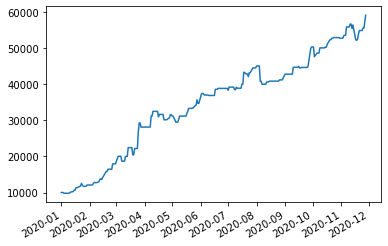

In [10]:
history_net_value_series.plot()